In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns
import pprint
import pandas as pd
import category_encoders as ce

In [197]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [199]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [200]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Text(0.5, 1.0, 'Age Distribution')

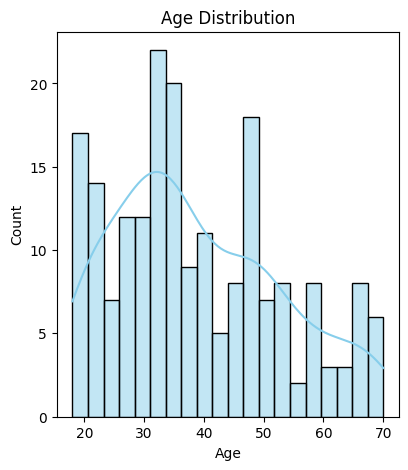

In [201]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

 dari tabel histogram diatas dapat disimpulkan jika kebanyaakan pelangganberusia 30 - 35,disekitar 47 - 49 dan diusia 19 - 23

Text(0.5, 1.0, 'Annual Income Distribution')

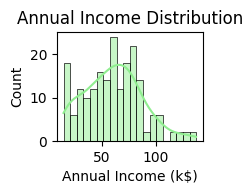

In [202]:
plt.subplot(3,3,2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='lightgreen')
plt.title('Annual Income Distribution')

dari histogram annual income diatas dapat didapatkan jika mayoritas pelanggan memiliki income disekitr 55 hingga 70k

/tmp/ipython-input-1211158630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')


Text(0.5, 1.0, 'Spending Score by Gender')

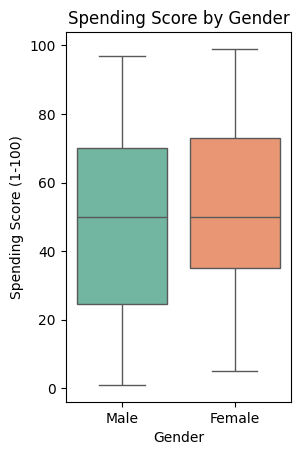

In [203]:
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title('Spending Score by Gender')

dari boxplot diatas didapatkan
 - median male dan female sama yaitu di angka 50
 - female memilikispending score yang lebih tinggi daripada male

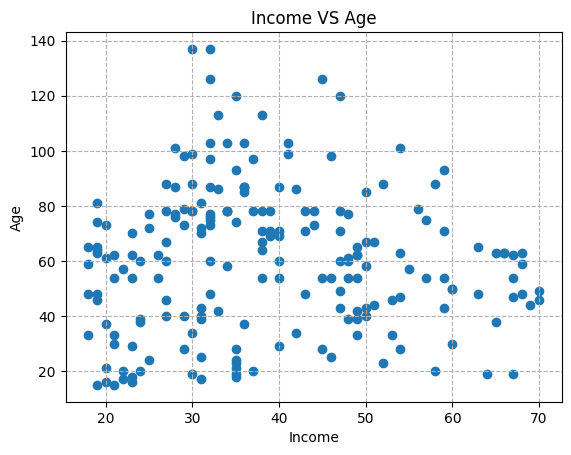

In [204]:
plt.scatter(df["Age"],df["Annual Income (k$)"])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

# Part B

In [207]:
gender_map = {
    'Gender': {'Male': 0, 'Female': 1}
}

# Terapkan mapping
for col, mapping in gender_map.items():
    df[col] = df[col].map(mapping)

print("=== Data setelah encoding ===")
print(df.head())

=== Data setelah encoding ===
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


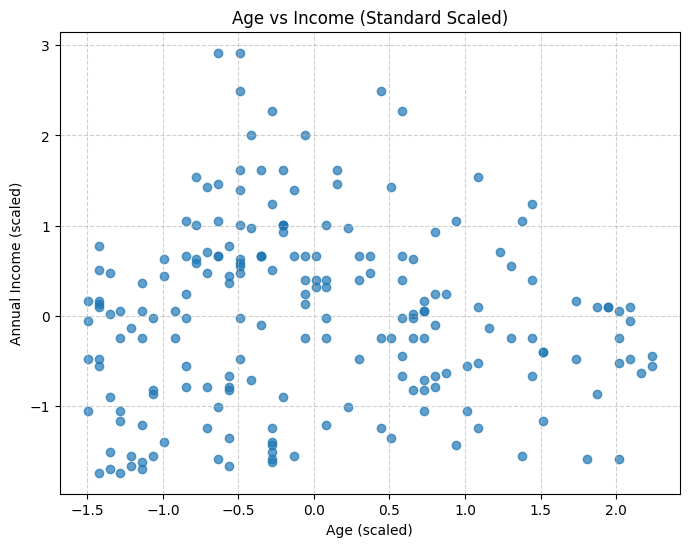

In [209]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik yang ingin di-scale
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Lihat hasil scaling
df_scaled.head()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled["Age"], df_scaled["Annual Income (k$)"], alpha=0.7)
plt.xlabel("Age (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.title("Age vs Income (Standard Scaled)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# ga bis selesai ce karena baru sadar g bisa disave sampe 9:40 terus progress hilang semua
